# 1. Intro
Hi, Kagglers!
I'm back with Python version.
Thanks to your attention, I've got 3rd place on this dataset with R!
* **Classification(R ver.) [ Breast Cancer or Not (with 15 ML)](https://www.kaggle.com/mirichoi0218/classification-breast-cancer-or-not-with-15-ml).**

For ANN Beginners like me, I hope this kernel helps you to understand Neural Network Algorithms, especially SLP(Single-Layer Perceptron).
At the end of this kernel, I hope you can make your own ANN model!

---

# 2. What is ANN & SLP?
### 2-1) ANN(Artificial Neural Network)
* The Artificial Neural Network consists of an input layer, a hidden layer, and an output layer.

![Imgur](https://elogeel.files.wordpress.com/2010/05/050510_1627_multilayerp1.png)


### 2-2) SLP(Single Layer Perceptron)

* If ANN model has no hidden layer, it is called single layer perceptron. 

![Imgur](https://www.analyticsvidhya.com/wp-content/uploads/2016/07/SLP.png)


### 2-3) Basic equation of ANN-SLP
* **Output = Weight * Input + Bias**
* For this equation, we already have output, input layers. But don't have weight value and bias value.
* Weight : a value that can give different weights depending on features and output 
    => [len(features), len(output)]
* bias : a value that can give different weights depending on features
    => [len(output)]


### 2-4) MLP(Multi Layer Perceptron)
* MLP(Multiple Layer Perceptron) model is ANN which has multiple hidden layers (more than 1) 

![Imgur](https://www.cc.gatech.edu/~san37/img/dl/mlp.png)


### 2-5) Basic equation of ANN-SLP
* **Output = (Weight1 x Input1) + (Weight2 x Input2) + ... + (WeightN x InputN) + Bias**
* For this equation, we already have output, input layers. But don't have weight value and bias value.
* Weight : a value that can give different weights depending on features and output 
    => [len(features), len(output)]
* bias : a value that can give different weights depending on features
    => [len(output)]


---

# 3. Import Libraries

In [15]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

---

# 4. Explore Dataset
## 4-1) Import dataset

In [16]:
wbcd = pd.read_csv('DATA/Opt_CL_SELL2_STAT_MINI.csv')
df=wbcd
wbcd.head()


,Profit,HH,Input,Score,ADX_Main,ADX_SMA,Dist_ADX,Dist_Step,H1,L1,...,I14,I15,I16,I17,I18,I19,I20,I21,I22,I23
0,1,17,1.000882,0.500299,0.059743,8.821454,3.307372,-1.172219,100.123500,99.894143,...,0,0,0,0,0,1,0,0,1,1
1,1,18,0.999289,0.504374,0.874736,-7.108584,7.185071,-2.112751,100.106496,99.520767,...,1,0,1,0,0,1,0,0,0,1
2,1,19,1.000711,0.504374,0.874736,7.114906,8.913855,-2.079630,100.053343,99.857752,...,0,0,0,1,0,1,0,1,1,1
3,0,19,1.002015,0.526126,5.225130,20.149342,9.536833,-1.898510,100.248845,99.697832,...,1,1,0,1,0,0,1,1,1,1
4,0,20,1.000355,0.529320,5.863995,3.546728,9.818086,-1.794008,100.195174,99.964514,...,0,1,0,1,0,0,0,0,0,1


In [17]:
print("This WBCD dataset is consisted of",wbcd.shape)

This WBCD dataset is consisted of (1129, 41)


## 4-2) Eliminate NaN value column

In [18]:
wbcd = wbcd.iloc[:,:-1]
print("This WBCD dataset is consisted of",wbcd.shape)


This WBCD dataset is consisted of (1129, 40)


## 4-3) Summary the Diagnosis

<AxesSubplot:xlabel='Profit', ylabel='count'>

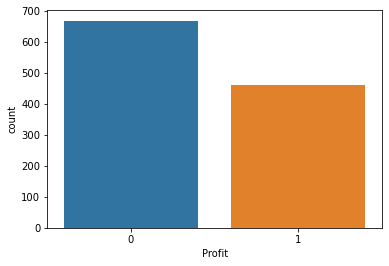

In [19]:
sns.countplot(wbcd['Profit'],label="Profit")

## 4-4) Correlation Plot of 30 features
except **id, diagnosis** columns => wbcd.iloc[:,2:]

Text(0.5, 1.05, 'Correlation of WBCD Features')

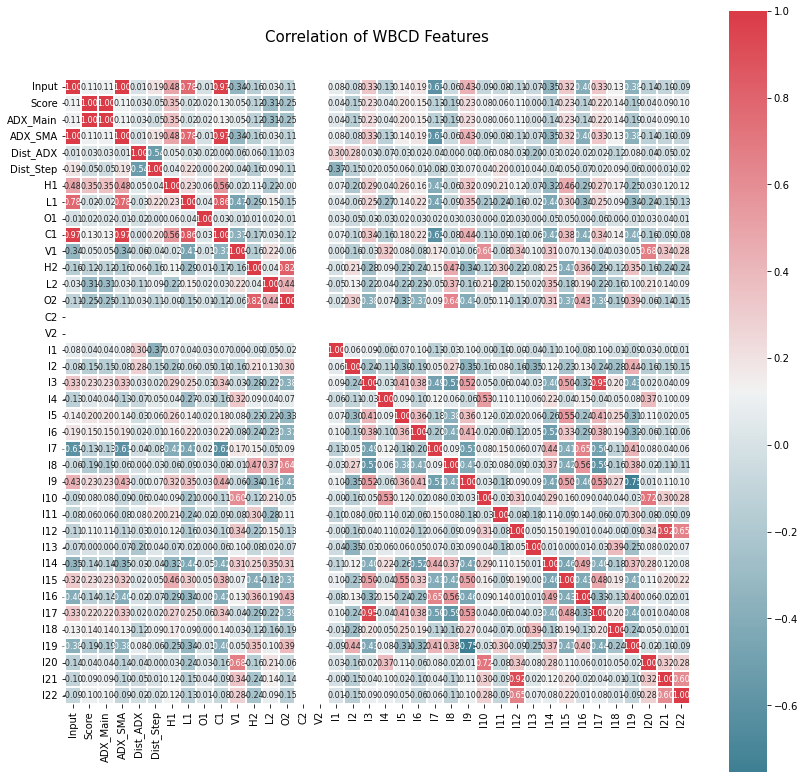

In [20]:
corr = wbcd.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of WBCD Features', y=1.05, size=15)

---

# 5. Preparing Data for machine learning
## 5-1) Divide "WBCD data" into Train(70%) / Test data(30%)
Divide the data into two(train/test) to see the predictive power of the model.


In [21]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = x.iloc[:len(x)-100,1:], x.iloc[len(x)-100: ,1:],  y.iloc[:len(x)-100], y.iloc[len(x)-100: ]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 39)
(100, 39)
(1029,)
(100,)


In [22]:
train_x,test_x, train_y,test_y=x_train,x_test,y_train,y_test

## 5-2) Drop ID column
* Save the **ID** column for later combination(results).
* Drop the **ID** column in train, test datasets, because it's unnecessary for model learning predictions.

## 5-3) Seperate x:Feature data(30) / y:Result data(1)
Seperate by **x_data, y_data**
* x_data : columns(features to predict **diagnosis**) for training. (eliminate diagnosis)
* y_data : columns for comparing with predictions results. (need original diagnosis)

### 5-3-1) Normalize x_data values for better prediction

### 5-3-2) Change Results(diagnosis) format : String -> Numeric

---

# 6. Make ANN-SLP Model
## 6-1) Make "Placeholder" for dinamic variable allocation
Placeholder is one of the function in tensorflow.
It is a space to put and change values while the program is running.
* for X, a place must have 30 columns, since wbcd data has 30 features.
* for Y, a place must have 1 columns, since the results has 1 outcome.
* If you see the row "None", it means it has no size limits. (You can write -1 instead of "None")

In [23]:
X = tf.placeholder(tf.float32, [None,30])
Y = tf.placeholder(tf.float32, [None, 1])

AttributeError: module 'tensorflow' has no attribute 'placeholder'

## 6-2) Make Weight, Bias value with randomly
* W(weight) : why **[30,1]**?  16 for 16 features, 1 for 1 Outcome(results).
* P(weight): why **[10,1]**? 10 for 10 PCA features, 1 for 1 Outcome(results).
* b(bias) : why **[1]**?  outcome has 1 layers.

In [ ]:
# weight
W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')

# bias
b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

## 6-3) Make Output Results
 * **Output = Weight * Input + Bias**
 * tf.matmul() : for array multiply

In [ ]:
logits = tf.matmul(X,W) + b

## 6-4) Cross Entropy
Before this, you have to know **How Linear Regression Works**
* Linear Regression: Draw a random line to find the **mean square root error** and find the slope and intercept to minimize this value (reduce the error to the minimum)
* Since Logits is also linear equation, you have to find minimum cost!

![Imgur](https://machinelearningblogcom.files.wordpress.com/2018/01/bildschirmfoto-2018-01-24-um-14-32-02.png?w=1400)

For example, logits(we get above) is **red line**, and the real dataset is **blue dot**. 
1. For finding cost, you have to substract all blue dot value with red line. 
2. Next, You add all distance you find and get average. 
3. For good prediction, this average distance of red line & blue dot must be minimum value. 

* tf.nn.sigmoid_cross_entropy_with_logits(): for gradient_descent with sig results(hypothesis).

In [ ]:
hypothesis = tf.nn.sigmoid(logits)

cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
cost = tf.reduce_mean(cost_i)
# cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))

## 6-5) Gradient Descent Optimizer

![Imgur](http://sebastianraschka.com/images/blog/2015/singlelayer_neural_networks_files/perceptron_gradient_descent_1.png)

* GradientDescentOptimizer: It makes the best result with the least error
* There are lots of optimizer methods provided in tensorflow. (GradientDescent, Adam, RMSProp, etc.)
* learning rate : It indicates the degree of descending size.

![Imgur](https://pbs.twimg.com/media/DK26ibcXUAEOwel.jpg)



In [ ]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

## 6-6) Compare : original vs. prediction

In [ ]:
prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
correct_prediction = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

## 6-7) Activate Model

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        sess.run(train, feed_dict={X: train_x, Y: train_y})
        if step % 1000 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
            print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
            
    train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
    test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
    print("Model Prediction =", train_acc)
    print("Test Prediction =", test_acc)

---

# 7. ANN Model Summary & Compare
## 7-1) ANN - SLP Model
* train_x, test_x : normalization data
* 30 features
* train_y, test_y

In [ ]:
def ann_slp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf.placeholder(tf.float32, [None,30])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([30,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)
    
    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_slp_train_acc, ann_slp_test_acc = ann_slp()

## 7-2) ANN - SLP - PCA Model
* pca_train_x, pca_test_x : normalization, PCA
* 30 -> 10 features
* train_y, test_y : we can use the same data as above activation values, since there are no changes in y_data

In [ ]:
def ann_slp_pca():
    sklearn_pca = sklearnPCA(n_components=10)

    print("===========Data Summary===========")
    pca_train_x = sklearn_pca.fit_transform(train_x)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(test_x)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,10])
    Y = tf.placeholder(tf.float32, [None, 1])

    W = tf.Variable(tf.random_normal([10,1], seed=0), name='weight')
    b = tf.Variable(tf.random_normal([1], seed=0), name='bias')

    logits = tf.matmul(X,W) + b
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.2).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: test_y})
        
        print("\n============Results============")
        print("PCA Model Prediction =", train_acc)
        print("PCA Test Prediction =", test_acc)
        
        return train_acc, test_acc
    
ann_slp_pca_train_acc, ann_slp_pca_test_acc = ann_slp_pca()

## 7-3) ANN - MLP Model
* train_x, test_x : normalization data
* 30 features
* train_y, test_y

In [ ]:
def ann_mlp():
    print("===========Data Summary===========")
    print("Training Data :", train_x.shape)
    print("Testing Data :", test_x.shape)

    X = tf.placeholder(tf.float32, [None,30])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([30,60], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([60], seed=0), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([60,60], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([60], seed=0), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([60,90], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([90], seed=0), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([90,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: test_x, Y: test_y})
        
        print("\n============Results============")
        print("Model Prediction =", train_acc)
        print("Test Prediction =", test_acc)
        
        return train_acc,test_acc
    
ann_mlp_train_acc, ann_mlp_test_acc = ann_mlp()

## 7-4) ANN - MLP - PCA Model
* pca_train_x, pca_test_x : normalization, PCA
* 30 -> 10 features
* train_y, test_y : we can use the same data as above activation values, since there are no changes in y_data

In [ ]:
def ann_mlp_pca():
    sklearn_pca = sklearnPCA(n_components=10)

    print("===========Data Summary===========")
    pca_train_x = sklearn_pca.fit_transform(train_x)
    print("PCA Training Data :", pca_train_x.shape)

    pca_test_x = sklearn_pca.fit_transform(test_x)
    print("PCA Testing Data :", pca_test_x.shape)

    X = tf.placeholder(tf.float32, [None,10])
    Y = tf.placeholder(tf.float32, [None, 1])

    # input
    W1 = tf.Variable(tf.random_normal([10,64], seed=0), name='weight1')
    b1 = tf.Variable(tf.random_normal([64], seed=0), name='bias1')
    layer1 = tf.nn.sigmoid(tf.matmul(X,W1) + b1)

    # hidden1
    W2 = tf.Variable(tf.random_normal([64,128], seed=0), name='weight2')
    b2 = tf.Variable(tf.random_normal([128], seed=0), name='bias2')
    layer2 = tf.nn.sigmoid(tf.matmul(layer1,W2) + b2)

    # hidden2
    W3 = tf.Variable(tf.random_normal([128,128], seed=0), name='weight3')
    b3 = tf.Variable(tf.random_normal([128], seed=0), name='bias3')
    layer3 = tf.nn.sigmoid(tf.matmul(layer2,W3) + b3)

    # output
    W4 = tf.Variable(tf.random_normal([128,1], seed=0), name='weight4')
    b4 = tf.Variable(tf.random_normal([1], seed=0), name='bias4')
    logits = tf.matmul(layer3,W4) + b4
    hypothesis = tf.nn.sigmoid(logits)

    cost_i = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=Y)
    cost = tf.reduce_mean(cost_i)

    train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

    prediction = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    correct_prediction = tf.equal(prediction, Y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

    print("\n============Processing============")
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for step in range(10001):
            sess.run(train, feed_dict={X: pca_train_x, Y: train_y})
            if step % 1000 == 0:
                loss, acc = sess.run([cost, accuracy], feed_dict={X: pca_train_x, Y: train_y})
                print("Step: {:5}\tLoss: {:.3f}\tAcc: {:.2%}".format(step, loss, acc))

        train_acc = sess.run(accuracy, feed_dict={X: pca_train_x, Y: train_y})
        test_acc,test_predict,test_correct = sess.run([accuracy,prediction,correct_prediction], feed_dict={X: pca_test_x, Y: test_y})
        
        print("\n============Results============")
        print("PCA Model Prediction =", train_acc)
        print("PCA Test Prediction =", test_acc)
        
        return train_acc,test_acc
        
ann_mlp_pca_train_acc, ann_mlp_pca_test_acc = ann_mlp_pca()

---

# 8. Show Results

In [ ]:
sub = pd.DataFrame()
sub['id'] = test_id
sub['Predict_Type'] = test_predict.astype(int)
sub['Origin_Type'] = test_y
sub['Correct'] = test_correct
sub.head(10)

---

# 9. Submission

In [ ]:
sub[['id','Predict_Type']].to_csv('submission.csv',index=False)

---

# 10. Conclusion
You can make your own ANN model with modifying **learning_rate, step range**.


Planning : ANN-SLP with PCA, ANN-MLP

Want to see my another kernels?

* **Linear Regression(R ver.) [ How much will the premium be?](https://www.kaggle.com/mirichoi0218/regression-how-much-will-the-premium-be)**

Upvotes and Comments are fully Welcomed :-)

Thank you for watching!